In [32]:
import pandas as pd

df = pd.read_csv('titanic.csv')

df.head()

,name,sex,age,embarked,home.dest,ticket,pclass,cabin,fare,sibsp,parch,survived,boat,body
0,"Allen, Miss. Elisabeth Walton",female,29.0000,Southampton,"St Louis, MO",24160,1,B5,211.34,0,0,1,2,NaN
1,"Allison, Master. Hudson Trevor",male,0.9167,Southampton,"Montreal, PQ / Chesterville, ON",113781,1,C22 C26,151.55,1,2,1,11,NaN
2,"Allison, Miss. Helen Loraine",female,2.0000,Southampton,"Montreal, PQ / Chesterville, ON",113781,1,C22 C26,151.55,1,2,0,NaN,NaN
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,Southampton,"Montreal, PQ / Chesterville, ON",113781,1,C22 C26,151.55,1,2,0,NaN,135.0
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,Southampton,"Montreal, PQ / Chesterville, ON",113781,1,C22 C26,151.55,1,2,0,NaN,NaN


In [30]:
# Group by the 'boat' column and sum the 'survived' column
boat_survivors = df.groupby("boat")['survived'].sum()

# Display the result
print('ther five boats that saved the largest amount of people are:\n', boat_survivors.sort_values(ascending=False)[:5])

ther five boats that saved the largest amount of people are:
 boat
13    39
C     37
15    37
14    32
4     31
Name: survived, dtype: int64


How many boats where there in total?

In [41]:
print(f'there were {df["boat"].nunique()} different boats saving people')

there were 27 different boats saving people


which boat saved the most MAN

In [45]:
male_boat_survivors = df[df['sex'] == 'male'].groupby('boat')['survived'].sum()

print(f'the boat with the most male survivors was the boat {male_boat_survivors.sort_values(ascending=False)[0]}')

the boat with the most male survivors was the boat 24


C:\Users\TimPr\AppData\Local\Temp\ipykernel_21408\3502324237.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'the boat with the most male survivors was the boat {male_boat_survivors.sort_values(ascending=False)[0]}')


In [51]:
# Filter for male survivors older than 20
male_boat_survivors = df[(df['sex'] == 'male') & (df['age'] > 20)].groupby('boat')['survived'].sum()

# Sort by the number of survivors and get the first boat with the most survivors
most_survivors_boat = male_boat_survivors.sort_values(ascending=False).iloc[0]

print(f'The boat with the most male adult survivors was the boat {most_survivors_boat}')


The boat with the most male survivors was the boat 17


In [58]:
# Group by 'boat' and sum the 'survived' column
boat_survivors = df.groupby('boat')['survived'].sum()

# Calculate the average number of survivors per boat
average_survivors_per_boat = boat_survivors.mean()

print(f'The average number of people saved by boat is {average_survivors_per_boat:.2f}')


The average number of people saved by boat is 17.67


In [69]:
# Filter for first-class passengers
firstclass_boat_survivors = df[df['pclass'] == 1].groupby('boat')['survived'].sum()

# Sort by the number of survivors and get the top 10 boats
most_survivors_boat = firstclass_boat_survivors.sort_values(ascending=False).head(10)

# Display the result
print(f'The boats with the most first class survivors were:\n{most_survivors_boat}')


The boats with the most first class survivors were:
boat
5     27
3     26
4     24
8     23
7     22
6     19
D      9
10     8
2      7
11     6
Name: survived, dtype: int64


In [72]:
average_fair_by_boat = df.groupby('boat')['fare'].mean()

print('the everage fair by boat was:',average_fair_by_boat)

the everage fair by boat was: boat
1           46.980000
10          62.155172
11          37.648800
12          19.688947
13          16.143590
13 15        7.510000
13 15 B      7.750000
14          32.688788
15          11.716216
15 16        7.750000
16          13.293478
2           92.127692
3          147.133846
4          127.922258
5           60.287407
5 7         52.000000
5 9         26.550000
6           83.375000
7           52.948261
8          100.560000
8 10        26.550000
9           26.464400
A           24.168182
B           24.306667
C           19.375263
C D         20.520000
D           35.993000
Name: fare, dtype: float64


- By boat: what was the (1) average fare, (2) the number of people with data on the paid fare, (3) the number of people saved? (Note: Please calculate this in one single query)

In [79]:
# Group by boat and aggregate the required statistics
boat_stats = df.groupby('boat').agg(
    average_fare=('fare', 'mean'),             # Average fare
    count_fare_data=('fare', 'count'),         # Count of fare entries
    survivors=('survived', 'sum')               # Number of survivors
)

# Display the resulting DataFrame
print(boat_stats)

         average_fare  count_fare_data  survivors
boat                                             
1           46.980000                5          5
10          62.155172               29         29
11          37.648800               25         25
12          19.688947               19         18
13          16.143590               39         39
13 15        7.510000                2          2
13 15 B      7.750000                1          1
14          32.688788               33         32
15          11.716216               37         37
15 16        7.750000                1          1
16          13.293478               23         23
2           92.127692               13         13
3          147.133846               26         26
4          127.922258               31         31
5           60.287407               27         27
5 7         52.000000                2          2
5 9         26.550000                1          1
6           83.375000               20         20


# 2. Investigation of fares
- The fares are given in British Pounds. 1 British Pound at that time corresponds to 161 US Dollar today. And 1 US Dollar corresponds currently to 0.90 Euro. Please convert the original fares to current day Euros, and store it in a new column. 


In [81]:
df['modern_fare'] = df['fare'] * 161 * 0.9

print(df['modern_fare'])

0       30623.166
1       21959.595
2       21959.595
3       21959.595
4       21959.595
          ...    
1304     2093.805
1305     2093.805
1306     1046.178
1307     1046.178
1308     1141.812
Name: modern_fare, Length: 1309, dtype: float64


- Are the fares provided in the data the prices paid by person, or the prices paid by ticket (potentially covering multiple people)? Carry out a detailed data analysis to answer this question.


In [83]:
df.count()

name           1309
sex            1309
age            1046
embarked       1307
home.dest       745
ticket         1309
pclass         1309
cabin           295
fare           1308
sibsp          1309
parch          1309
survived       1309
boat            486
body            121
modern_fare    1308
dtype: int64

In [88]:
print(df['fare'].describe())


count    1308.000000
mean       33.295635
std        51.758749
min         0.000000
25%         7.900000
50%        14.450000
75%        31.280000
max       512.330000
Name: fare, dtype: float64


- What are other interesting patterns related to the fares paid? Freely explore!

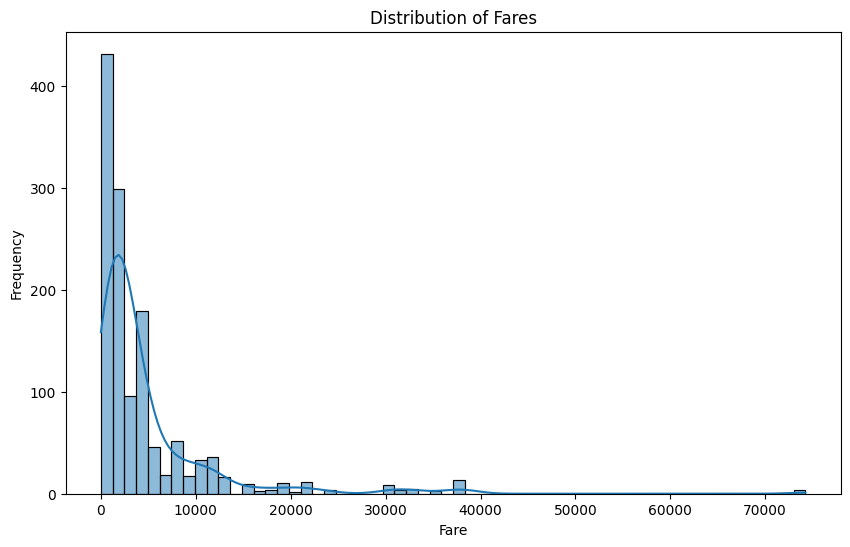

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['modern_fare'], bins=60, kde=True)
plt.title('Distribution of Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [93]:
average_fare_by_class = df.groupby('pclass')['fare'].mean()
print(average_fare_by_class)


pclass
1    87.509040
2    21.179242
3    13.303136
Name: fare, dtype: float64


In [95]:
ticket_counts = df['ticket'].value_counts()
shared_tickets = ticket_counts[ticket_counts > 1]
print(f'Shared tickets:\n{shared_tickets}')


Shared tickets:
ticket
CA. 2343    11
1601         8
CA 2144      8
PC 17608     7
347077       7
            ..
13507        2
PC 17603     2
13050        2
113776       2
PC 17585     2
Name: count, Length: 216, dtype: int64
